In [4]:
from src.clients.database import DatabaseConnection
import plotly.graph_objects as go

In [32]:
def visualise_raw(ts):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = ts.index, y = ts))
    return fig


def visualise_prediction(train_set, test_set, prediction):
    fig = go.Figure()    
    fig.add_trace(go.Scatter(x = test_set.index, y = test_set))
    fig.add_trace(go.Scatter(x = train_set.index, y = train_set))
    fig.add_trace(go.Scatter(x = predictions.index, y = predictions))
    return fig

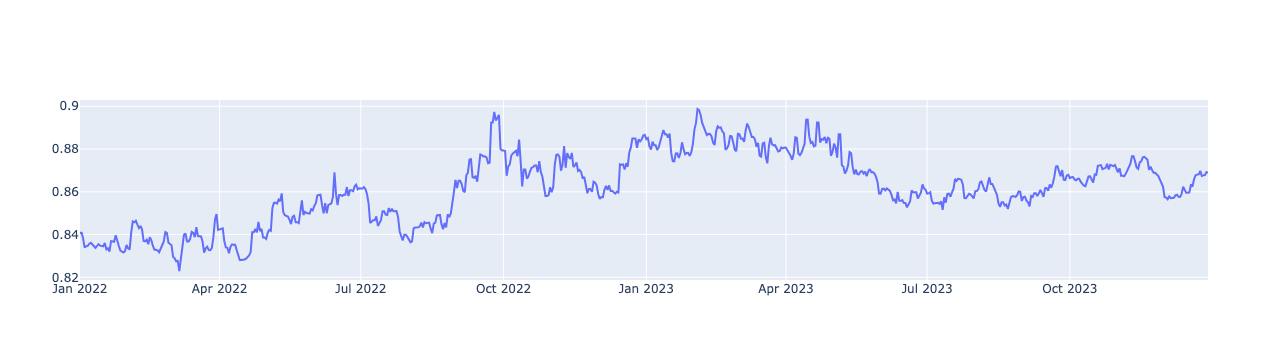

In [24]:
# Get data

db = DatabaseConnection()
ts = db.get_rates_as_series(base_currency='EUR', quote_currency='GBP')
ts = ts.asfreq('D')
fig = visualise_raw(ts)
fig

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Assuming 'ts' is a pandas Series containing EUR/USD values

# Splitting the data into training and test sets
train_size = int(len(ts) * 0.8)  # Adjust the percentage for training set size
train_set, test_set = ts[:train_size], ts[train_size:]

# Define ARIMA order and other hyperparameters
order = (5, 1, 0)  # Example order for ARIMA model (you can tune this)

try:
    # Build the ARIMA model
    model = ARIMA(train_set, order=order)
    fitted_model = model.fit(method='statespace')  # Try different methods: 'css', 'mle', etc.

    # Check for convergence
    if not fitted_model.mle_retvals['converged']:
        print("Optimization did not converge.")
        print("Number of iterations:", fitted_model.mle_retvals['iterations'])
        # You may want to try different hyperparameters or initial values

    # Make predictions on the test set
    predictions = fitted_model.forecast(steps=len(test_set))

    # Display the predictions
    print("Predictions:", predictions)

except Exception as e:
    print("An error occurred:", str(e))


Predictions: 2023-08-06    0.864133
2023-08-07    0.863956
2023-08-08    0.863827
2023-08-09    0.863604
2023-08-10    0.863627
                ...   
2023-12-25    0.863744
2023-12-26    0.863744
2023-12-27    0.863744
2023-12-28    0.863744
2023-12-29    0.863744
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


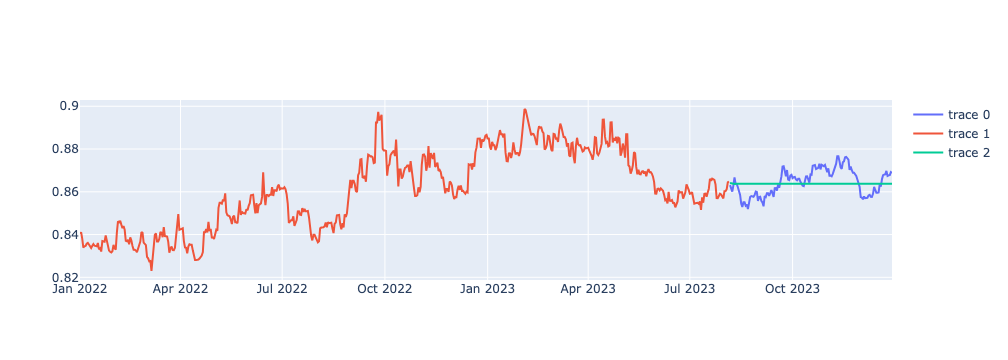

In [33]:
visualise_prediction(train_set, test_set, predictions)
    

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Assuming 'ts' is a pandas Series containing EUR/USD values

window_size = 30  # Size of the rolling window for training
predictions = []  # List to store predictions

for i in range(len(ts) - window_size):
    # Define training and test sets for each iteration
    train_set = ts[i:i + window_size]
    test_set = ts[i + window_size:i + window_size + 1]  # Predicting the next day

    try:
        # Build the ARIMA model for each iteration
        model = ARIMA(train_set, order=(5, 1, 0))  # Example order for ARIMA model (you can tune this)
        fitted_model = model.fit()

        # Make predictions for the next day
        prediction = fitted_model.forecast(steps=1)[0]
        predictions.append(prediction)

    except Exception as e:
        print(f"An error occurred in iteration {i}: {str(e)}")
        predictions.append(np.nan)  # Append NaN for failed predictions

# Display the predictions
print("Predictions:", predictions)


/var/folders/t0/fnw50j4n0wxdk_h29_p4rnz00000gn/T/ipykernel_1787/3936050593.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/georgegarforth/code/trading/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/t0/fnw50j4n0wxdk_h29_p4rnz00000gn/T/ipykernel_1787/3936050593.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/georgegarforth/code/trading/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check

Predictions: [0.8327579802437493, 0.8350891369932585, 0.8341316971707159, 0.8324758338963091, 0.8369280358271614, 0.8455127975048142, 0.8459155981386854, 0.8477352292829453, 0.8425911803080004, 0.8422980083202978, 0.8441494639147943, 0.842096541440429, 0.8366294148885768, 0.8373041374969311, 0.8371151663782779, 0.8358981001448682, 0.841079908618217, 0.8346020124301304, 0.8364559699532838, 0.8315525250722067, 0.8331411148834936, 0.832368800991875, 0.831720846723125, 0.8345481047890202, 0.8339457327070123, 0.8382904396539566, 0.8423380390042869, 0.8395701004313184, 0.8347381066494097, 0.8356808404830913, 0.8340307751147394, 0.8295063535654783, 0.830487548119077, 0.8247234774580777, 0.828978850538923, 0.8234552471022796, 0.8276645641979671, 0.8323181555030841, 0.8413746425335444, 0.8456440869726233, 0.8319179245379369, 0.8357309928823206, 0.836247243101532, 0.8414116604190911, 0.8409888995887722, 0.837824233233554, 0.8445897762243627, 0.838966070114311, 0.8386222429772453, 0.8397473435465

/Users/georgegarforth/code/trading/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/var/folders/t0/fnw50j4n0wxdk_h29_p4rnz00000gn/T/ipykernel_1787/3936050593.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

